# sample 에서 gt json 을 만든다

In [63]:
sample_root = './from_iitp'

In [64]:
from glob import glob
import pandas as pd
import os
from pathlib import Path

In [71]:
labels = sorted([f for f in glob(os.path.join(sample_root+'/**/*.json'), recursive=True) 
                 if os.path.isfile(f)])
imgs = sorted([f for f in glob(os.path.join(sample_root+'/**/*.jpg'), recursive=True) 
                 if os.path.isfile(f)])

# 10초 이내 쓰러진 파일은 제거
imgs   = [e for e in imgs if Path(e).parent.name != '24']
labels = [str(Path(e).with_suffix('.json')).replace('videos', 'labels') for e in imgs] 
display(len(labels), len(imgs))
display(labels[:2])
assert(len(imgs) == len(labels))

24009

24009

['from_iitp/labels/01/GH010171 001.json',
 'from_iitp/labels/01/GH010171 002.json']

In [86]:
import json

gt = dict(annotations=[])
for f in labels:
    with open(f) as fd:
        l = json.load(fd)
    if 'box' in l.keys():
        assert(len(l['box']) == 4 and isinstance(l['box'][0], int))
        x1, y1, x2, y2 = l['box']
        gt['annotations'].append(dict(
            file_name = l['file_name'],
            box = [
                dict(
                    position = [x1, y1, x2, y2],
                    confidence_score = 0
                )]))
    else:
        gt['annotations'].append(dict(
            file_name = l['file_name'],
            box = [],
        ))


In [87]:
with open('./gt_except_24.json', 'w') as fd:
    fd.write(json.dumps(gt, sort_keys=True, indent=4))

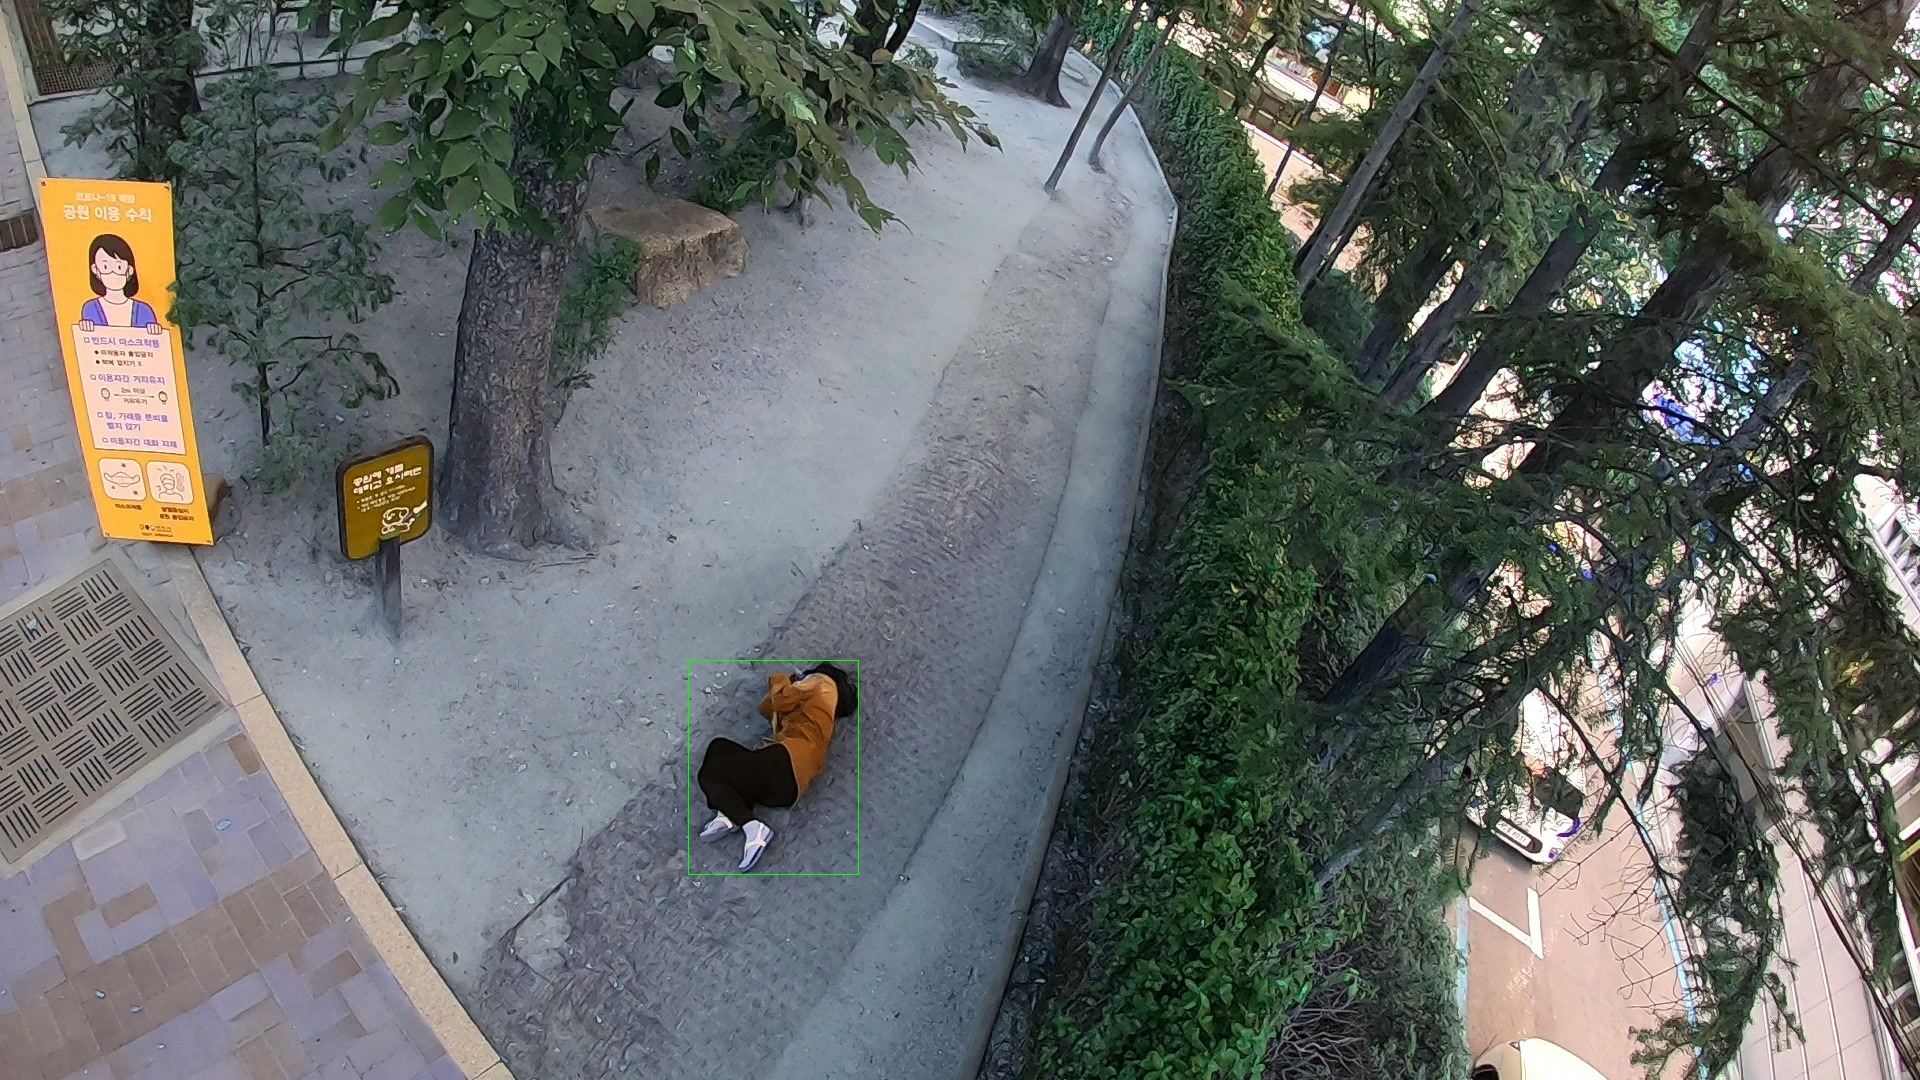

In [88]:
import cv2
from PIL import Image
im = cv2.imread('from_iitp/videos/41/GH010219 613.jpg')
cv2.rectangle(im, (688, 660), (858, 874), (0, 255, 0))
Image.fromarray(im)